## Working with Sea Surface Temperatures

In [1]:
# #installing the necessary modules
# !pip install --user xarray
# !python -m pip install --user basemap
# !pip install folium
# !pip install cartopy
# !pip install --user metpy
# !pip install basemap
# conda install -c conda-forge pyproj

In [1]:
#importing the libraries to be used

############################################
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr
import cartopy
import cartopy.crs as ccrs
from cartopy import feature as cf
import seaborn as sns
import calendar
import warnings
############################################

# from mpl_toolkits.basemap import Basemap
#from metpy.cbook import get_test_data
# from matplotlib import cm
# import matplotlib.ticker as mticker


In [2]:
######################################
#loading the dataset5
era5_combined = xr.open_dataset('era5_sst.nc')
era5_combined

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 408)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1990-01-01 1990-02-01 ... 2023-12-01
Data variables:
    sst        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-03-03 18:48:11 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [3]:
# Convert temperature from Kelvin to Celsius
era5_combined = era5_combined - 273.15

## Global Descriptive Statistics


In [5]:
# Select the data and retrieve the values
sst_data = era5_combined['sst'].sel(time=slice('1991', '2023')).values

# Ensure the data is a NumPy array
if not isinstance(sst_data, np.ndarray):
    sst_data = sst_data.compute() if hasattr(sst_data, 'compute') else np.array(sst_data)

# Remove NaN values from the data
sst_data = sst_data[~np.isnan(sst_data)]

# Compute the mean
sst_mean = np.mean(sst_data)

# Compute the standard deviation
sst_std = np.std(sst_data)

# Compute the maximum
sst_max = np.max(sst_data)

# Compute the minimum
sst_min = np.min(sst_data)

# Compute the median
sst_median = np.median(sst_data)

# Compute the 25th percentile
sst_25 = np.percentile(sst_data, 25)

# Compute the 50th percentile (same as the median)
sst_50 = np.percentile(sst_data, 50)

# Compute the 75th percentile
sst_75 = np.percentile(sst_data, 75)

# Print or use the results
print("Mean:", sst_mean)
print("Standard Deviation:", sst_std)
print("Median:", sst_median)
print("Maximum:", sst_max)
print("Minimum:", sst_min)
print("25th Percentile:", sst_25)
print("50th Percentile:", sst_50)
print("75th Percentile:", sst_75)


Mean: 13.787791
Standard Deviation: 11.660475
Median: 14.775482
Maximum: 36.531403
Minimum: -3.8838806
25th Percentile: 1.0924072265625
50th Percentile: 14.775482177734375
75th Percentile: 25.55816650390625


## Heatmaps

In [5]:
# Extract SST data for the year 2023
sst_2023 = era5_combined['sst'].sel(time='2023')

# Calculate the average SST for the year 2023
sst_2023_avg = sst_2023.mean(dim='time')

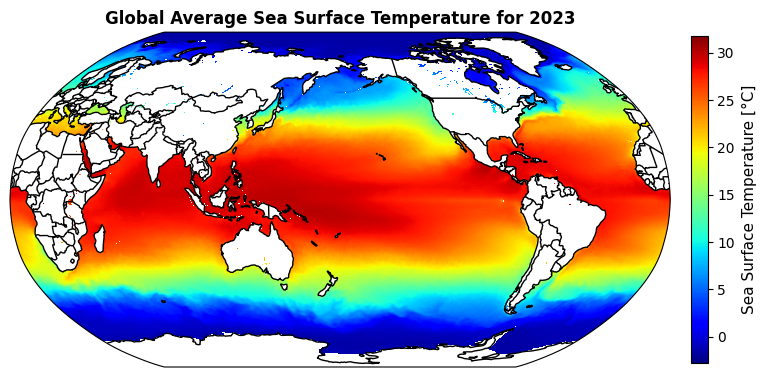

In [6]:
# define the function
def Global_plot(ERA5_dataset, title):
    fig, ax = plt.subplots(figsize=(9, 4.5), 
                           subplot_kw=dict(projection=ccrs.Robinson(central_longitude = 180)))

    im = ax.pcolormesh(ERA5_dataset.longitude, 
                       ERA5_dataset.latitude, 
                       ERA5_dataset,
                       transform=ccrs.PlateCarree(), 
                       cmap='jet', 
                       shading='auto')

    ax.add_feature(cf.BORDERS) #, linestyle=':')
    ax.coastlines(resolution='110m')
    
    # Set the title of the map with specified font weight
    ax.set_title(title, fontweight='bold')
    
    # Adding colorbar
    cb = plt.colorbar(im, fraction=0.0235, pad=0.03)
    cb.set_label(label = 'Sea Surface Temperature [°C]', fontsize=11, rotation=90, labelpad = 5)

    #display the plot
    plt.show()

# Call the function with the SST data for 2023 and a custom title
Global_plot(sst_2023_avg, 'Global Average Sea Surface Temperature for 2023')


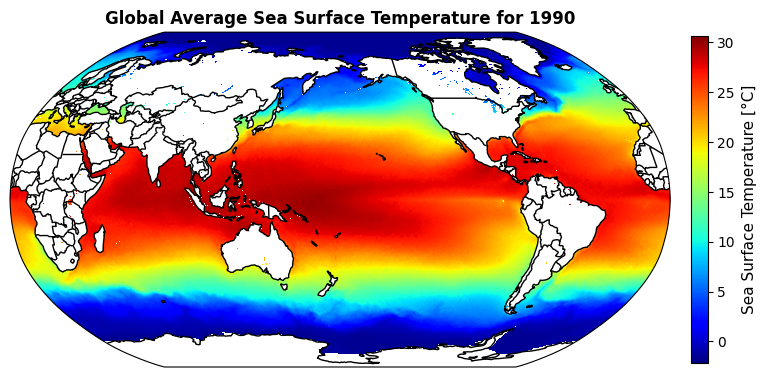

In [7]:
# Extract SST data for the year 1990
sst_1990 = era5_combined['sst'].sel(time='1990')

# Calculate the average SST for the year 1990
sst_1990_avg = sst_1990.mean(dim='time')


#plotting for 1990
# Call the function with the SST data for 2023 and a custom title
Global_plot(sst_1990_avg, 'Global Average Sea Surface Temperature for 1990')


In [8]:
# define the function
def Global_plot(ERA5_dataset, title):
    fig, ax = plt.subplots(figsize=(9, 4.5), 
                           subplot_kw=dict(projection=ccrs.Robinson(central_longitude = 180)))

    im = ax.pcolormesh(ERA5_dataset.longitude, 
                       ERA5_dataset.latitude, 
                       ERA5_dataset,
                       transform=ccrs.PlateCarree(), 
                       vmin=-3, 
                       vmax= 3,
                       cmap='RdBu_r', 
                       shading='auto')

    ax.add_feature(cf.BORDERS) #, linestyle=':')
    ax.coastlines(resolution='110m')
    
    # Set the title of the map with specified font weight
    ax.set_title(title, fontweight='bold')
    
    
    # Adding colorbar
    cb = plt.colorbar(im, fraction=0.0235, pad=0.03)
    cb.set_label(label = 'Sea Surface Temperature [°C]', fontsize=11, rotation=90, labelpad = 5)

    # display title
    plt.show()

# # Call the function with the SST data for 2023 and a custom title
# Global_plot(sst_2023_avg, 'Global Average Sea Surface Temperature for 2023')


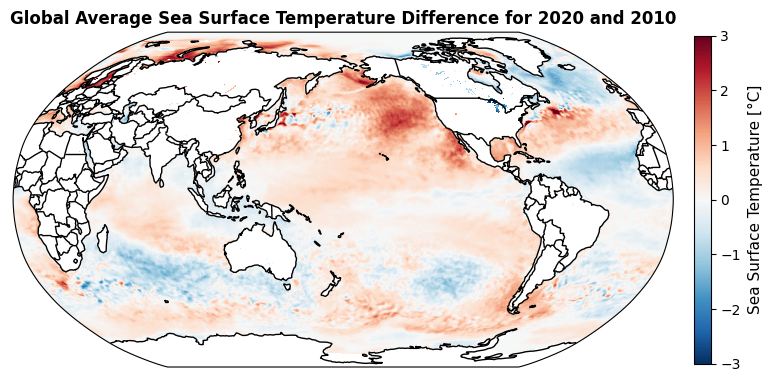

In [9]:
#difference between two years
#select the specific years needed
sst_2010 = era5_combined['sst'].sel(time='2010')
sst_2020 = era5_combined['sst'].sel(time='2020')
sst_2010_avg = sst_2010.mean(dim='time')
sst_2020_avg = sst_2020.mean(dim='time')

#calculate the mean difference
sst_diff_avg = sst_2020.mean(dim='time') - sst_2010.mean(dim='time')

# Call the function with the SST data for 2023 and a custom title
Global_plot(sst_diff_avg, 'Global Average Sea Surface Temperature Difference for 2020 and 2010')


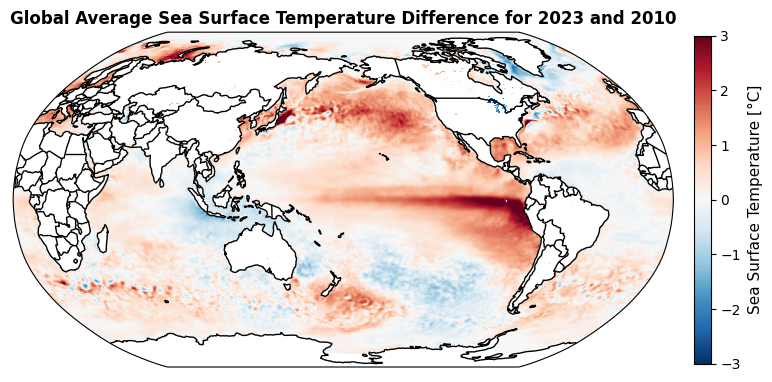

In [10]:
#difference between the two years
#select the specific years needed
sst_2010 = era5_combined['sst'].sel(time='2010')
sst_2023 = era5_combined['sst'].sel(time='2023')

#calculate the average for each year
sst_2010_avg = sst_2010.mean(dim='time')
sst_2023_avg = sst_2023.mean(dim='time')

#calculate the mean difference
sst_diff_avg = sst_2023.mean(dim='time') - sst_2010.mean(dim='time')

# Call the function with the SST data for 2023 and a custom title
Global_plot(sst_diff_avg, 'Global Average Sea Surface Temperature Difference for 2023 and 2010')

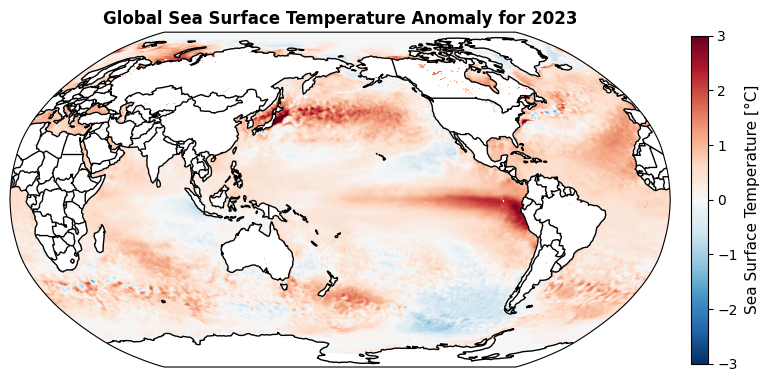

In [11]:
#difference between the years
#select the specific years needed
sst_1990_2022 =  era5_combined['sst'].sel(time=slice('1990', '2022'))
sst_2023 =  era5_combined['sst'].sel(time='2023')

#calculate the averages
sst_2023_avg = sst_2023.mean(dim='time')
sst_1990_2022_avg = sst_1990_2022.mean(dim='time')

#calculate the mean difference
sst_diff_avg = sst_2023_avg - sst_1990_2022_avg

# Call the function with the SST data for 2023 and a custom title
Global_plot(sst_diff_avg, 'Global Sea Surface Temperature Anomaly for 2023')

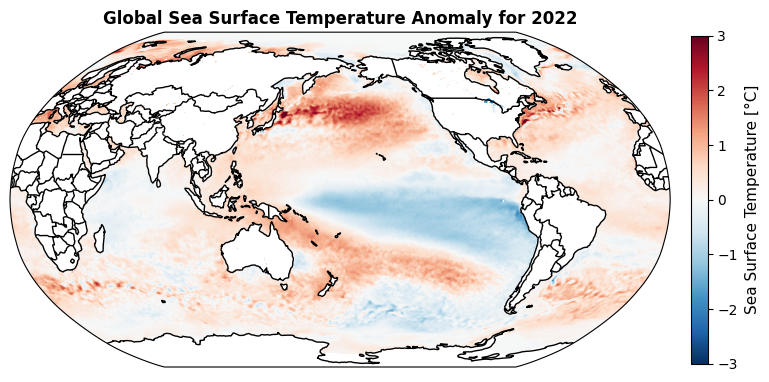

In [12]:
#difference between the years
#select the specific years needed
sst_1991_2020 =  era5_combined['sst'].sel(time=slice('1991', '2020')) #base period
sst_2022 =  era5_combined['sst'].sel(time='2022')

#calculate the averages
sst_2022_avg = sst_2022.mean(dim='time')
sst_1991_2020_avg = sst_1991_2020.mean(dim='time')

#calculate the mean difference
sst_diff_avg = sst_2022_avg - sst_1991_2020_avg

# Call the function with the SST data for 2023 and a custom title
Global_plot(sst_diff_avg, 'Global Sea Surface Temperature Anomaly for 2022')

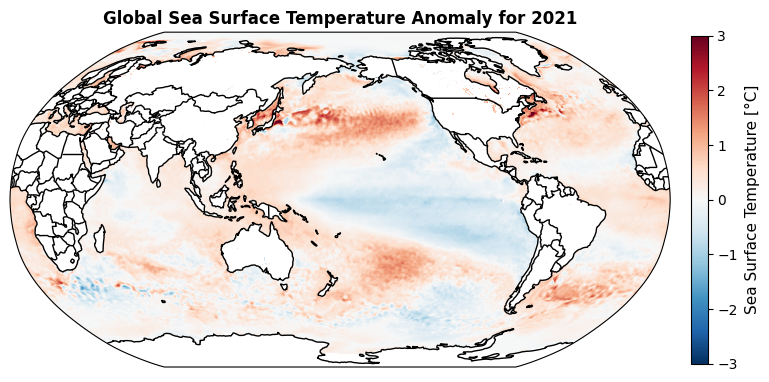

In [13]:
#difference between the years
#select the specific years needed
sst_1991_2020 =  era5_combined['sst'].sel(time=slice('1991', '2020')) #base period
sst_2021 =  era5_combined['sst'].sel(time='2021')

#calculate the averages
sst_2021_avg = sst_2021.mean(dim='time')
sst_1991_2020_avg = sst_1991_2020.mean(dim='time')

#calculate the mean difference
sst_diff_avg = sst_2021_avg - sst_1991_2020_avg

# Call the function with the SST data for 2021 and a custom title
Global_plot(sst_diff_avg, 'Global Sea Surface Temperature Anomaly for 2021')

### Monthly 2023 Global Sea Surface Temperature Anomaly

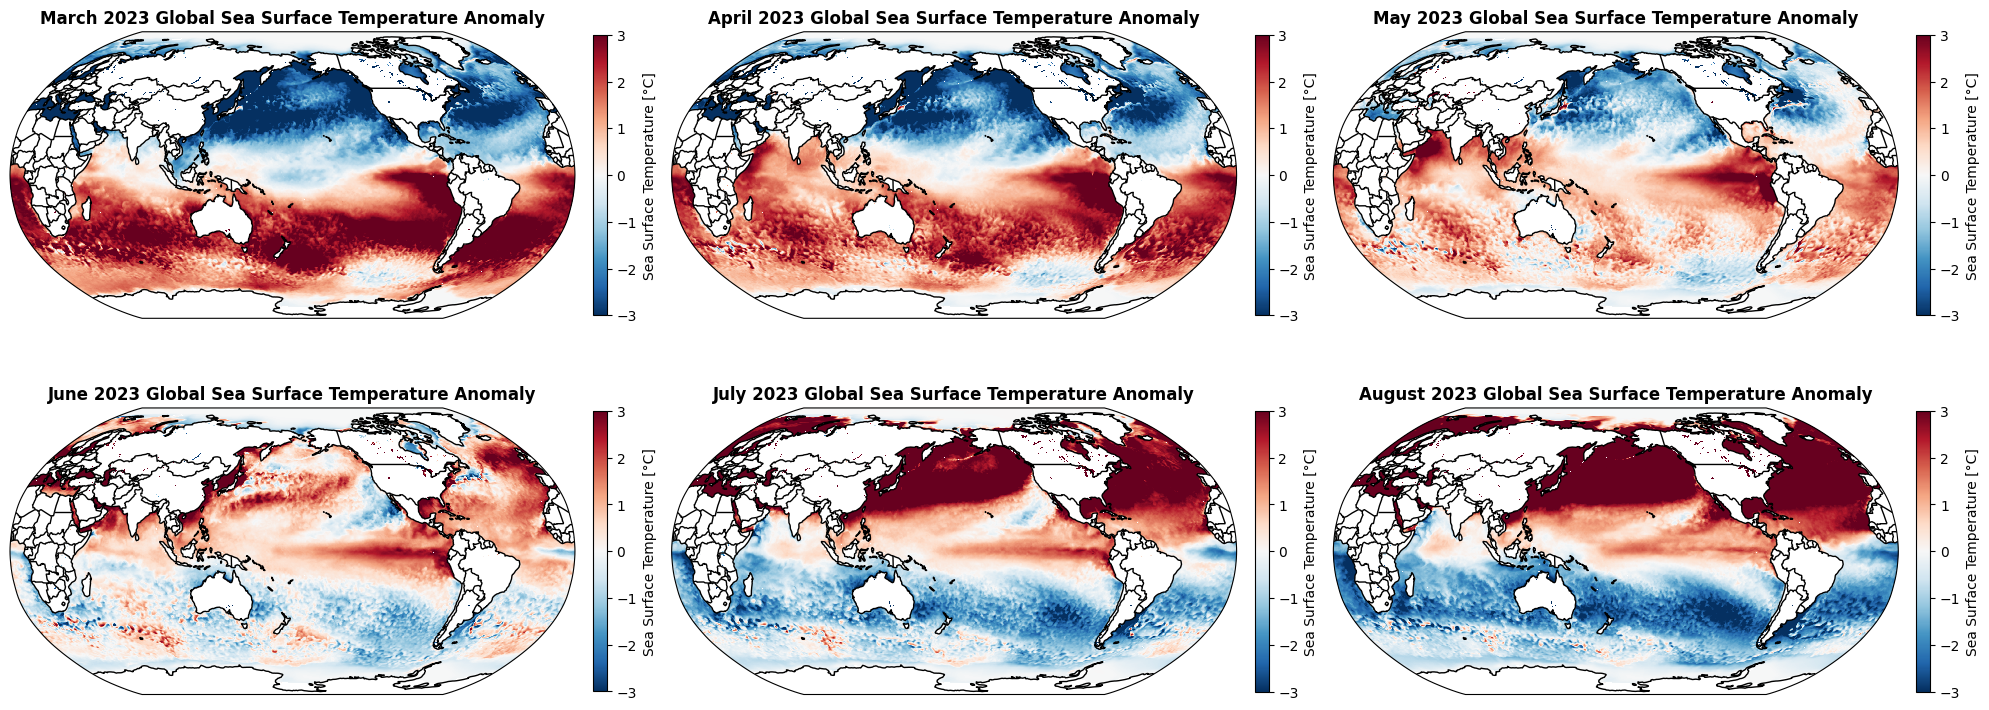

In [22]:

#define the function
def Global_plot(ERA5_dataset, title, ax):
    im = ax.pcolormesh(ERA5_dataset.longitude, 
                       ERA5_dataset.latitude, 
                       ERA5_dataset,
                       transform=ccrs.PlateCarree(), 
                       vmin=-3, 
                       vmax= 3,
                       cmap='RdBu_r', 
                       shading='auto')

    ax.add_feature(cf.BORDERS)
    ax.coastlines(resolution='110m')
   # ax.set_extent([-20, 16, -1, 20], crs=ccrs.PlateCarree())
    
    
    cb = plt.colorbar(im, ax=ax, fraction=0.0235, pad=0.03)
    cb.set_label(label = 'Sea Surface Temperature [°C]', fontsize=10, rotation=90)

    ax.set_title(title, fontweight='bold')

# Create a 2 by 3 subplot layout
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 8),
                         subplot_kw=dict(projection=ccrs.Robinson(central_longitude = 180)))


# List of months
months = ['March', 'April', 'May', 'June', 'July', 'August']

# Iterate through each month and plot
for i, month in enumerate(months):
    row = i // 3
    col = i % 3
    
    #difference between the years
    #select the specific years needed
    sst_1991_2020 =  era5_combined['sst'].sel(time=slice('1991', '2020')) #base period
    
    # Let's start with the current month in 2023
    current_month = '2023-{:02d}'.format(i + 3)
    sst_month_2023 = era5_combined['sst'].sel(time=current_month)
    
    # Calculate averages
    sst_month_2023_avg = sst_month_2023.mean(dim='time')
    sst_1991_2020_avg = sst_1991_2020.mean(dim='time')
    
    # Calculate the mean difference
    sst_diff_avg = sst_month_2023_avg - sst_1991_2020_avg
    
    # Plot on the corresponding subplot
    Global_plot(sst_diff_avg, f'{month} 2023 Global Sea Surface Temperature Anomaly', axs[row, col])

fig.tight_layout()  
plt.show()


### Monthly 2022 Global Sea Surface Temperature Anomaly

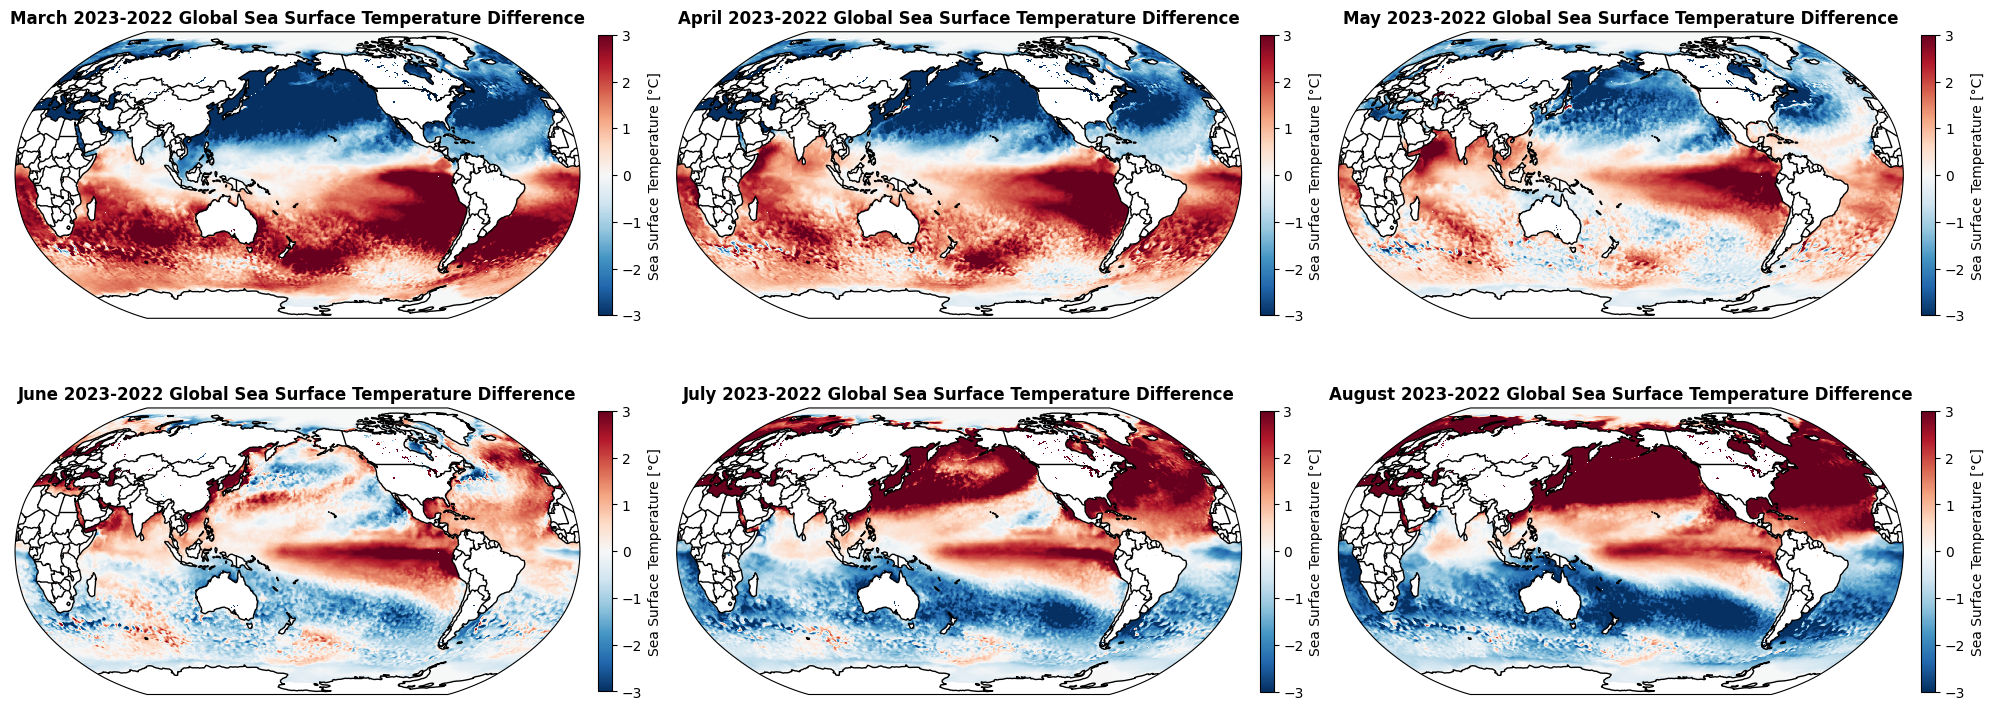

In [21]:
def Global_plot(ERA5_dataset, title, ax):
    im = ax.pcolormesh(ERA5_dataset.longitude, 
                       ERA5_dataset.latitude, 
                       ERA5_dataset,
                       transform=ccrs.PlateCarree(), 
                       vmin=-3, 
                       vmax= 3,
                       cmap='RdBu_r', 
                       shading='auto')

    ax.add_feature(cf.BORDERS)
    ax.coastlines(resolution='110m')
   # ax.set_extent([-20, 16, -1, 20], crs=ccrs.PlateCarree())
    
    
    cb = plt.colorbar(im, ax=ax, fraction=0.0235, pad=0.03)
    cb.set_label(label = 'Sea Surface Temperature [°C]', fontsize=10, rotation=90)

    ax.set_title(title, fontweight='bold')

# Create a 2 by 3 subplot layout
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 8),
                         subplot_kw=dict(projection=ccrs.Robinson(central_longitude = 180)))


# List of months
months = ['March', 'April', 'May', 'June', 'July', 'August']

# Iterate through each month and plot
for i, month in enumerate(months):
    row = i // 3
    col = i % 3
    
    #difference between the years
    #select the specific years needed
    sst_1991_2020 =  era5_combined['sst'].sel(time= '2022') #base period
    
    # Let's start with the current month in 2023
    current_month = '2023-{:02d}'.format(i + 3)
    sst_month_2023 = era5_combined['sst'].sel(time=current_month)
    
    # Calculate averages
    sst_month_2023_avg = sst_month_2023.mean(dim='time')
    sst_1991_2020_avg = sst_1991_2020.mean(dim='time')
    
    # Calculate the mean difference
    sst_diff_avg = sst_month_2023_avg - sst_1991_2020_avg
    
    # Plot on the corresponding subplot
    Global_plot(sst_diff_avg, f'{month} 2023-2022 Global Sea Surface Temperature Difference', axs[row, col])

fig.tight_layout()  
plt.show()


## Global Time Series Analysis

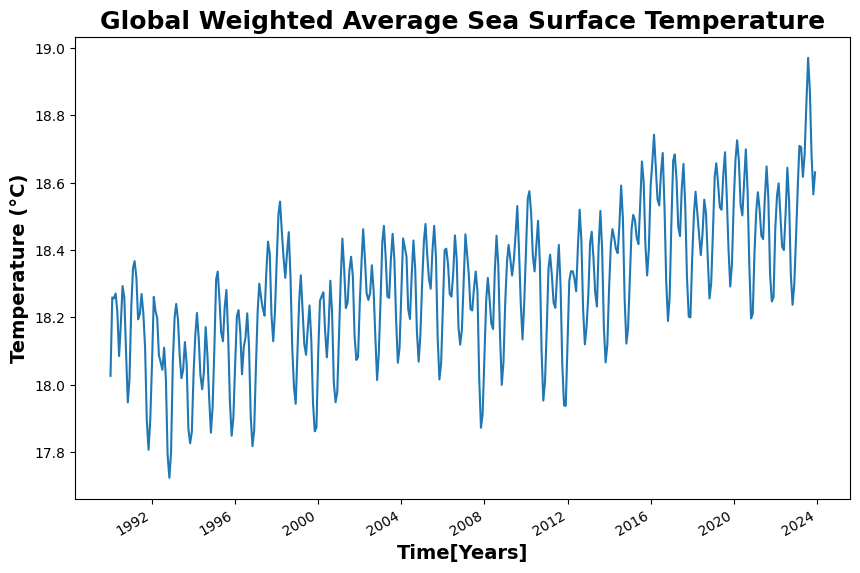

In [5]:
# Calculate weights
weights = np.cos(np.deg2rad(era5_combined['sst'].latitude))
weights.name = "weights"

# Apply weights to the dataset
sst_weighted = era5_combined['sst'].weighted(weights)

# Calculate the weighted mean
sst_mean = sst_weighted.mean(["longitude", "latitude"])

# Plot the mean using a line plot
plt.figure(figsize=(10, 6))
sst_mean.plot()
plt.title('Global Weighted Average Sea Surface Temperature', fontweight='bold', fontsize = '18')
plt.xlabel('Time[Years]', fontweight='bold', fontsize = '14')
plt.ylabel('Temperature (°C)', fontweight='bold', fontsize = '14')
plt.show()

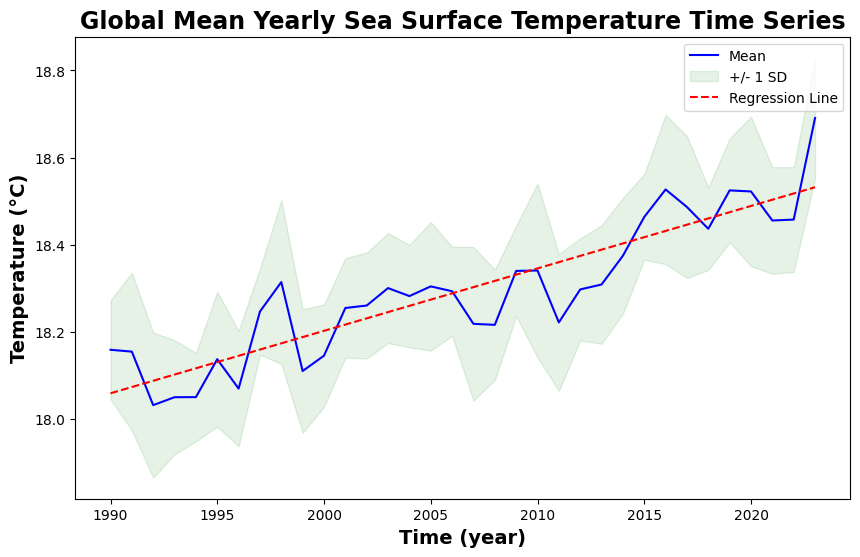

In [7]:


#calculate mean
sst_yearly = sst_mean.groupby('time.year').mean() 

#calculate standard deviation
std = sst_mean.groupby('time.year').std()

# Calculate the regression line
slope, intercept = np.polyfit(sst_yearly.year, sst_yearly, 1)
regression_line = slope * sst_yearly.year + intercept

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Plot the mean
ax.plot(sst_yearly.year, sst_yearly, color='blue', label='Mean')

# Plot the standard deviation
ax.fill_between(sst_yearly.year, (sst_yearly + std), (sst_yearly - std), alpha=0.1, color='green', label='+/- 1 SD')

# Plot the regression line
ax.plot(sst_yearly.year, regression_line, color='red', linestyle='--', label='Regression Line')

# Customize the plot
plt.title('Global Mean Yearly Sea Surface Temperature Time Series', fontweight='bold', fontsize = '17')
plt.xlabel('Time (year)', fontweight='bold', fontsize = '14')
plt.ylabel('Temperature (°C)', fontweight='bold', fontsize = '14')
plt.legend()

plt.show()



## Bar chart to visualize the time series of anomalies

In [6]:

sst_yearly = sst_mean.groupby('time.year').mean() 

sst_subset = sst_yearly.where((sst_yearly.year > 1990) & (sst_yearly.year < 2021), drop=True)
sst_clim = sst_subset.mean()
sst_anom = sst_yearly - sst_clim

df = sst_anom.to_dataframe()
df['positive'] = df['sst'] > 0
df.head() # show only first five rows


sst  positive
year                    
1990 -0.117159     False
1991 -0.121387     False
1992 -0.244131     False
1993 -0.225943     False
1994 -0.225773     False

Text(0, 0.5, 'Sea Surface Temperature [°C]')

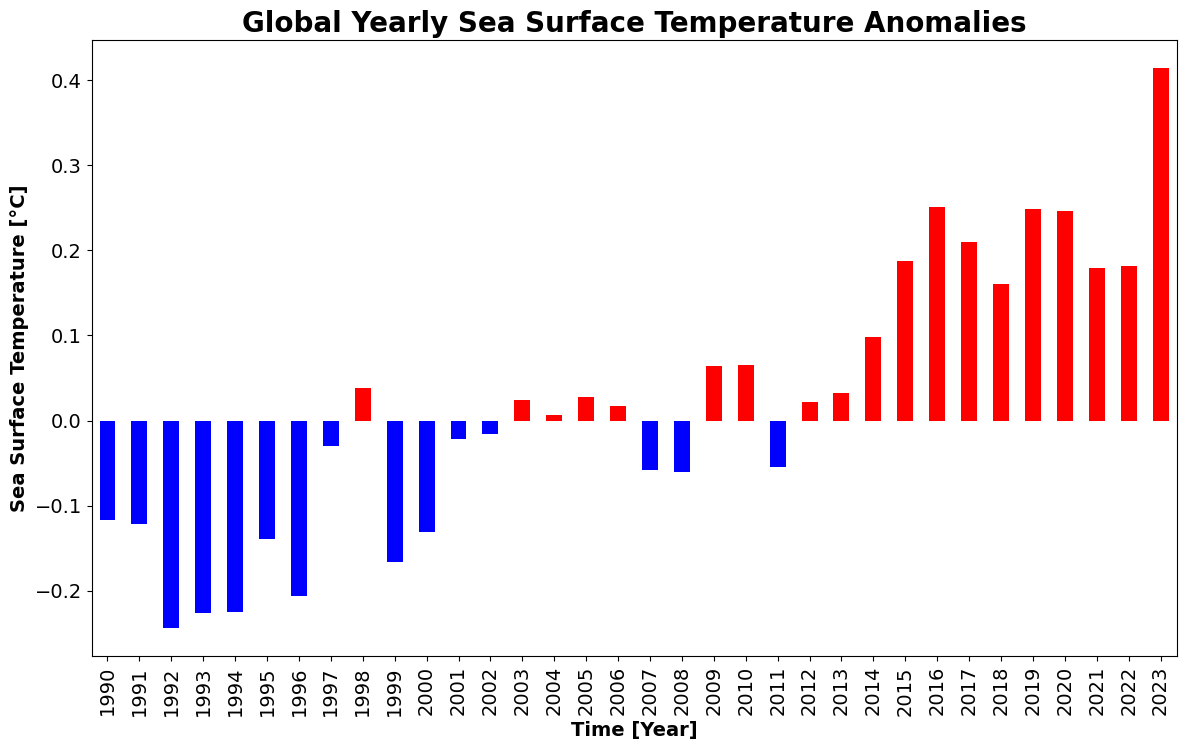

In [15]:
plt.rcParams.update({'font.size': 20}) # must set in top
# Create the plot
ax = df['sst'].plot(
    figsize=(14, 8),
    kind='bar',
    color=df.positive.map({True: 'red', False: 'blue'}),
    fontsize=14
)

# Set the title 
ax.set_title('Global Yearly Sea Surface Temperature Anomalies', fontweight='bold', fontsize='20')

# Set the x-label and y-label 
ax.set_xlabel('Time [Year]', fontweight='bold', fontsize='14')
ax.set_ylabel('Sea Surface Temperature [°C]', fontweight='bold', fontsize='14')

### West Africa Time Series

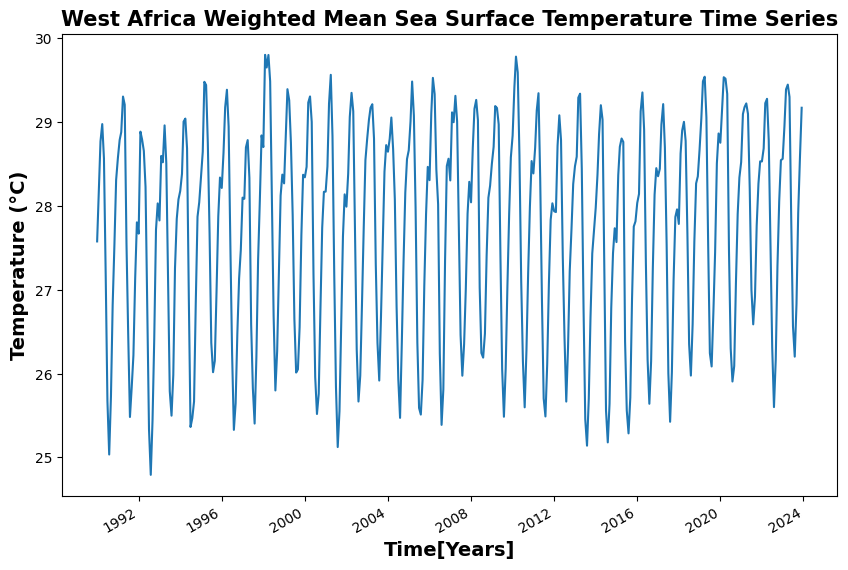

In [13]:
west_africa_sst = era5_combined.sel(longitude = slice(-20, 16), latitude = slice(18, -1))

# Calculate weights
weights1 = np.cos(np.deg2rad(west_africa_sst['sst'].latitude))
weights1.name = "weights1"

# Apply weights to the dataset
sst_weighted1 = west_africa_sst['sst'].weighted(weights1)

# Calculate the weighted mean
sst_mean1 = sst_weighted1.mean(["longitude", "latitude"])

# Plot the mean using a line plot
plt.figure(figsize=(10, 6))
sst_mean1.plot()
plt.title('West Africa Weighted Mean Sea Surface Temperature Time Series', fontweight='bold', fontsize = '15')
plt.xlabel('Time[Years]', fontweight='bold', fontsize = '14')
plt.ylabel('Temperature (°C)', fontweight='bold', fontsize = '14')
plt.show()

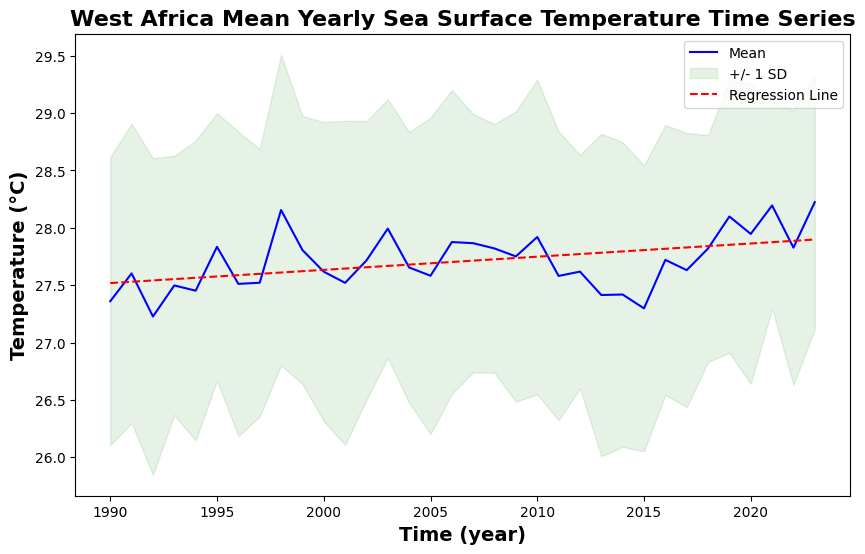

In [17]:

# Calculate mean
sst_yearly1 = sst_mean1.groupby('time.year').mean() 

# Calculate standard deviation
std1 = sst_mean1.groupby('time.year').std()

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.plot(sst_yearly1.year, sst_yearly1, color='blue', label='Mean')

ax.fill_between(sst_yearly1.year, (sst_yearly1 + std1), (sst_yearly1 - std1), alpha=0.1, color='green', label='+/- 1 SD')

# Prepare data for regression line
years = sst_yearly1.year.values
temperatures = sst_yearly1.values
slope, intercept = np.polyfit(years, temperatures, 1)
regression_line = slope * years + intercept

# Plot regression line
ax.plot(years, regression_line, color='red', linestyle='--', label='Regression Line')

plt.title('West Africa Mean Yearly Sea Surface Temperature Time Series', fontweight='bold', fontsize = '16')
plt.xlabel('Time (year)', fontweight='bold', fontsize = '14')
plt.ylabel('Temperature (°C)', fontweight='bold', fontsize = '14')
plt.legend()

plt.show()


## Bar chart to visualize the time series of anomalies

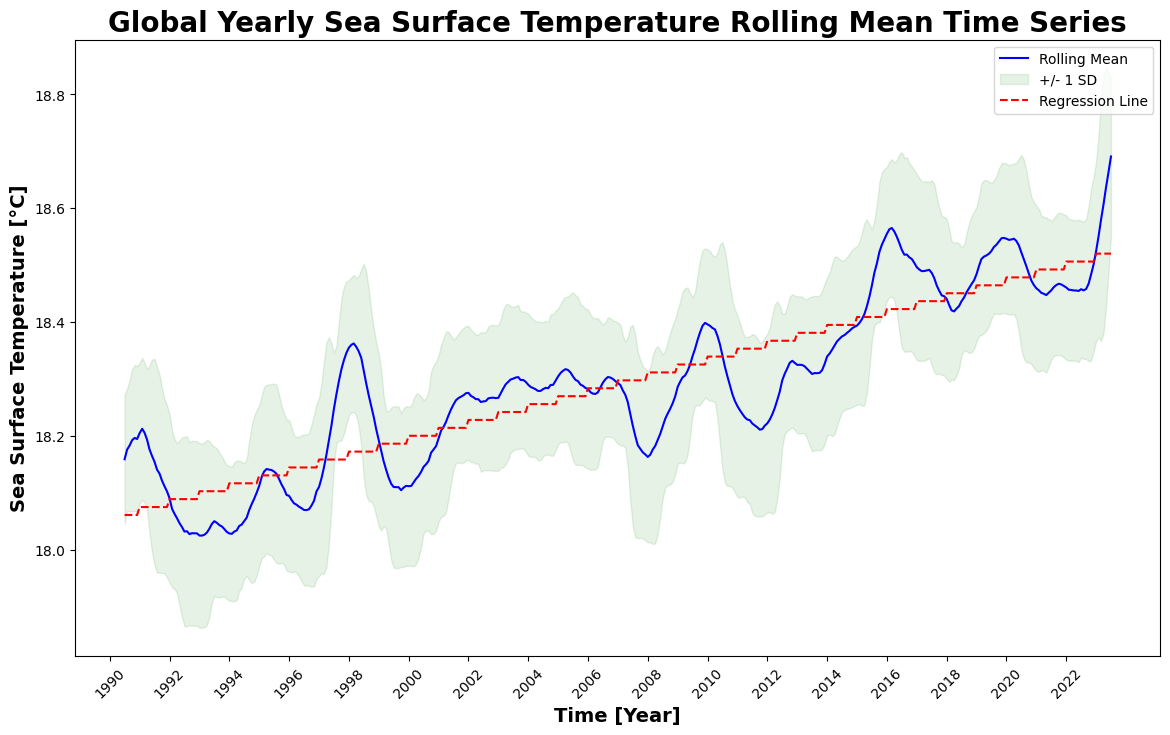

In [4]:

west_tp = era5_combined

# Calculate normalized weights
_, lat_field = np.meshgrid(west_tp.longitude.values, west_tp.latitude.values)
weight = np.cos(np.pi * lat_field / 180)
data = np.ma.masked_invalid(west_tp.sst)
weight[data.mask[0, :, :]] = np.nan
weight_normalized = weight / np.nansum(weight)

# Apply weights to the precipitation data
west_tp['weight_normalized'] = xr.DataArray(
    weight_normalized, coords=[west_tp.latitude.values, west_tp.longitude.values], dims=['latitude', 'longitude'])
west_tp['tp_norma'] = west_tp.sst * west_tp.weight_normalized

# Calculate the global values
west_tp_m = west_tp.tp_norma.sum(dim=['latitude', 'longitude'])

# Calculate the 12-month rolling mean and standard deviation, multiplied by 1000 for unit conversion if needed
west_tp_mean_rolling = west_tp_m.rolling(time=12, center=True).mean().dropna('time')
std_rr = west_tp_m.rolling(time=12, center=True).std().dropna('time') 

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

ax.plot(west_tp_mean_rolling.time, west_tp_mean_rolling, color='blue', label='Rolling Mean')
ax.fill_between(west_tp_mean_rolling.time, (west_tp_mean_rolling + std_rr), (west_tp_mean_rolling - std_rr), alpha=0.1, color='green', label='+/- 1 SD')

# Prepare data for the regression line
time_encoded = np.array(west_tp_mean_rolling.time.values, dtype='datetime64[Y]').astype(float)  # Convert times to float years
slope, intercept = np.polyfit(time_encoded, west_tp_mean_rolling, 1)
regression_line = slope * time_encoded + intercept

# Plot regression line
ax.plot(west_tp_mean_rolling.time, regression_line, color='red', linestyle='--', label='Regression Line')

# Add title, x- and y-labels
plt.title('Global Yearly Sea Surface Temperature Rolling Mean Time Series', fontweight='bold', fontsize=20)
plt.ylabel("Sea Surface Temperature [°C]", fontsize=14, fontweight='bold')
plt.xlabel("Time [Year]", fontsize=14, fontweight='bold')
plt.legend()

# Custom x-ticks
dateStart = pd.to_datetime('1990-01-01', format='%Y-%m-%d')
date_End = pd.to_datetime('2023-12-01', format='%Y-%m-%d')
dates_rng = pd.date_range(dateStart, date_End, freq='2YS')
plt.xticks(dates_rng, [dtz.strftime('%Y') for dtz in dates_rng], rotation=45)

plt.show()
